In [27]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten
from keras.datasets import mnist 

## Data Load and Preprocess

In [28]:
# load Data, x is for digit images, y is for digit labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

## Data Example

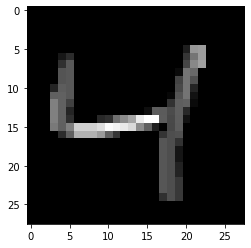

In [29]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.imshow(x_train[2], cmap='gray')

<Figure size 432x288 with 0 Axes>

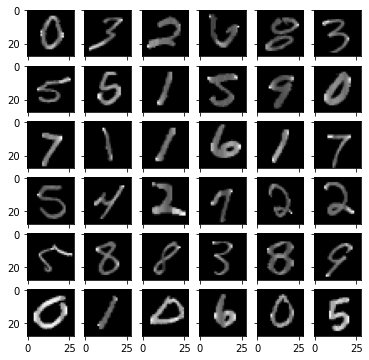

In [30]:
ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)
sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(
    ROWS,ROWS,
    figsize=(ROWS,ROWS),
    sharex=True,
    sharey=True
)

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]
    
    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image,cmap='gray')

## Linear Model

In [31]:
img_pixels = 28*28
output_size = 10
hidden_size = 128
batch_size = 128
learning_rate = .001
epoch_num = 10

In [32]:
model = Sequential()

model.add(Flatten())
model.add(Dense(hidden_size, activation= keras.activations.relu))
model.add(Dense(hidden_size, activation= keras.activations.relu))
model.add(Dense(hidden_size, activation= keras.activations.relu))
model.add(Dense(output_size, activation = keras.activations.softmax))

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

result0 = model.evaluate(x_test, y_test)
print("Initial loss is {loss}, Initial accuracy is {acc}".format(loss = result0[0], acc = result0[1]))

10000/10000 [==============================] - 3s 264us/step
Initial loss is 2.3159421463012695, Initial accuracy is 0.0844


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(
    x_train, 
    y_train, 
    epochs= epoch_num, 
    batch_size= batch_size,
    initial_epoch=0
)
model.save("trained_mnist.model")

Epoch 1/10
60000/60000 [==============================] - 8s 139us/step - loss: 2.1882 - acc: 0.4060
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 1.3314 - acc: 0.7398
Epoch 3/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.6437 - acc: 0.8327
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.4692 - acc: 0.8712
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.4010 - acc: 0.8868
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.3645 - acc: 0.8962
Epoch 7/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3403 - acc: 0.9018
Epoch 8/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.3218 - acc: 0.9070
Epoch 9/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.3067 - acc: 0.9113
Epoch 10/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.2941 - acc: 0.914

In [35]:
model.save("trained_mnist.model")

[0.0844, 0.40601666673024495, 0.7397833333651225, 0.8326500000317891, 0.8712333333969117, 0.886816666730245, 0.8962333333651225, 0.9017666666666667, 0.9070000000635783, 0.9112666666984558, 0.9147166666666666]


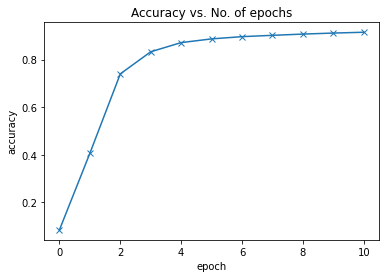

In [36]:
accuracies = history.history['acc']
accuracies.insert(0,result0[1])
print(accuracies)
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [37]:
val_los, val_acc = model.evaluate(x_test, y_test)
print(val_los, val_acc)

10000/10000 [==============================] - 1s 136us/step
0.2825737998962402 0.9171


3

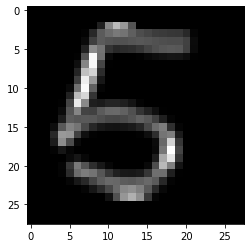

In [38]:
from PIL import Image
def test_image(img, model):
    pred = model.predict(img)
    ans = np.argmax(pred)
    return ans

img = Image.open('3test.png')
# greyscale conversion and other preprocessing
img = img.convert('L')
img = keras.preprocessing.image.img_to_array(img)
img = keras.utils.normalize(img, axis=1)
plt.imshow(img, cmap='gray')
img.resize(1,28,28)
test_image(img, model)

## Data Clean Up

In [40]:
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.reshape(-1,28,28,1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Convolutional NN

In [80]:
from keras.layers import Conv2D, MaxPooling2D, Dropout
img_pixels = 28*28
output_size = 10
hidden_size = 128
batch_size = 128
learning_rate = .001
epoch_num = 10

filters_1 = 32
filters_2 = 64

filter_size = 3

In [81]:
model_1 = Sequential()

model_1.add(
    Conv2D(
        filters = filters_1, 
        kernel_size = filter_size,
        activation = 'relu', 
    ))
model_1.add(MaxPooling2D((2,2)))

model_1.add(
    Conv2D(
        filters = filters_2, 
        kernel_size = filter_size,
        activation = 'relu'
    ))
model_1.add(MaxPooling2D((2,2)))

model_1.add(Dropout(.25))
model_1.add(Flatten())
model_1.add(Dense(hidden_size, activation= keras.activations.relu))
model_1.add(Dense(hidden_size, activation= keras.activations.relu))
model_1.add(Dropout(.5))
model_1.add(Dense(10, activation = keras.activations.softmax))

model_1.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [82]:
result0 = model_1.evaluate(x_test, y_test)
print("Initial loss is {loss}, Initial accuracy is {acc}".format(loss = result0[0], acc = result0[1]))

10000/10000 [==============================] - 6s 643us/step
Initial loss is 2.3018419235229493, Initial accuracy is 0.1044


In [83]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 512)       1180160   
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 512)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 5, 512)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               1638528   
__________

In [84]:
history = model_1.fit(
    x_train, 
    y_train, 
    epochs= epoch_num, 
    batch_size= batch_size,
    initial_epoch=0
)

Epoch 1/10
60000/60000 [==============================] - 54s 894us/step - loss: 2.1255 - acc: 0.3176
Epoch 2/10
60000/60000 [==============================] - 44s 730us/step - loss: 0.9259 - acc: 0.7084
Epoch 3/10
60000/60000 [==============================] - 43s 724us/step - loss: 0.5317 - acc: 0.8398
Epoch 4/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.4044 - acc: 0.8799
Epoch 5/10
60000/60000 [==============================] - 44s 733us/step - loss: 0.3324 - acc: 0.9022
Epoch 6/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.2807 - acc: 0.9178
Epoch 7/10
60000/60000 [==============================] - 43s 723us/step - loss: 0.2436 - acc: 0.9281
Epoch 8/10
60000/60000 [==============================] - 43s 724us/step - loss: 0.2165 - acc: 0.9366
Epoch 9/10
60000/60000 [==============================] - 44s 726us/step - loss: 0.1988 - acc: 0.9414
Epoch 10/10
60000/60000 [==============================] - 43s 725us/step - loss: 

[0.1044, 0.3175500000635783, 0.7083666666666667, 0.8397666667302449, 0.8798666667302449, 0.9021666667302449, 0.917816666730245, 0.9281000000317892, 0.9365666666666667, 0.9413500000635783, 0.9454500000635783]


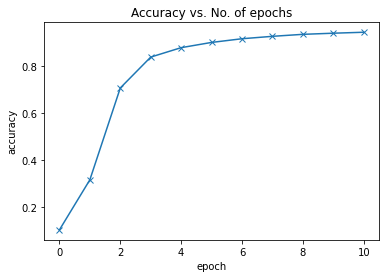

In [85]:
accuracies = history.history['acc']
accuracies.insert(0,result0[1])
print(accuracies)
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [86]:
val_los, val_acc = model_1.evaluate(x_test, y_test)
print(val_los, val_acc)

10000/10000 [==============================] - 4s 360us/step
0.10884755752086639 0.9644


In [87]:
img.resize(1,28,28,1)
test_image(img, model_1)

5